         Qtr1     Qtr2     Qtr3     Qtr4
Year                                    
1996    89.13    89.52    89.88    90.12
1997    89.19    89.78    90.03    90.38
1998    90.27    90.77    91.85    92.51
1999    92.21    92.52    93.62    94.15
2000    94.69    95.34    96.04    96.30
Year         
1996     Qtr1    89.13
         Qtr2    89.52
         Qtr3    89.88
         Qtr4    90.12
1997     Qtr1    89.19
dtype: float64


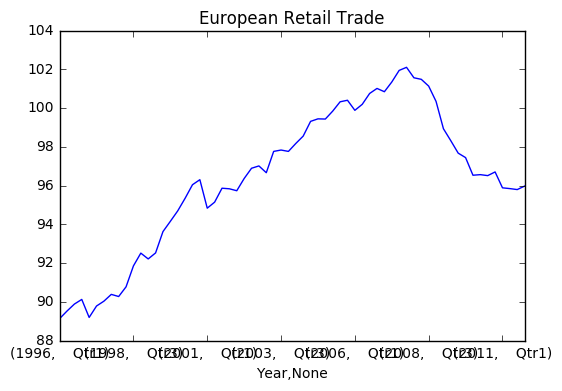

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('../../assets/data/euretail.csv')
df = df.set_index(['Year'])
print df.head()
df.stack().plot(title='European Retail Trade')
print df.stack().head()

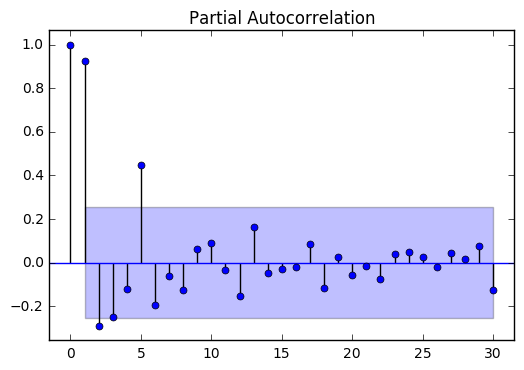

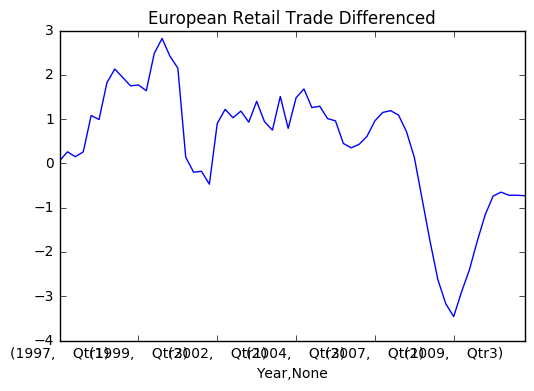

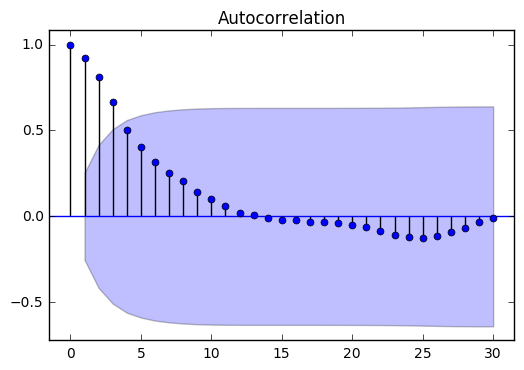

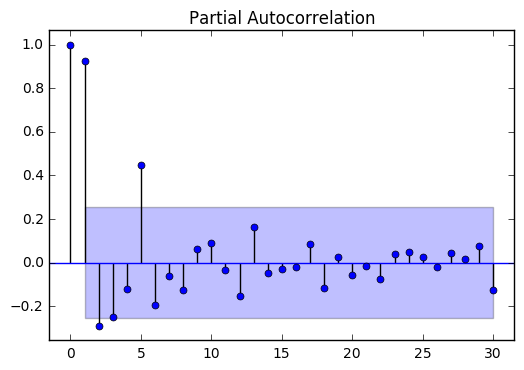

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff0 = df.stack().diff(periods=4)[4:]
diff0.plot(title='European Retail Trade Differenced')
plot_acf(diff0, lags=30)
plot_pacf(diff0, lags=30)

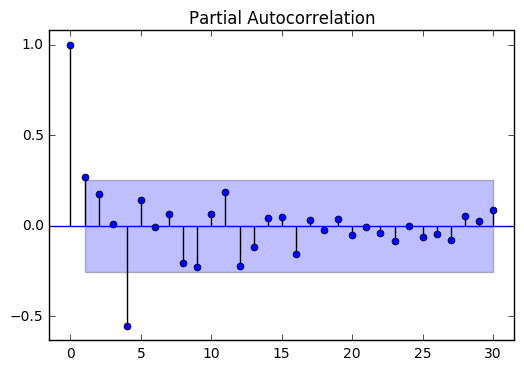

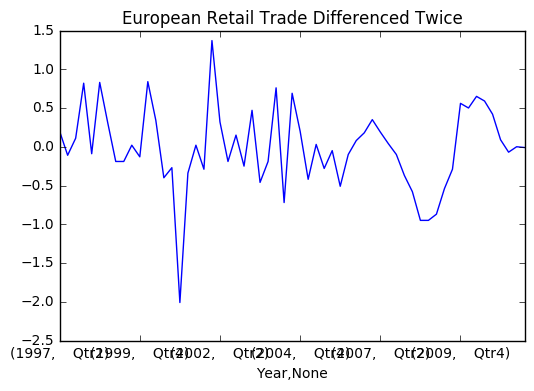

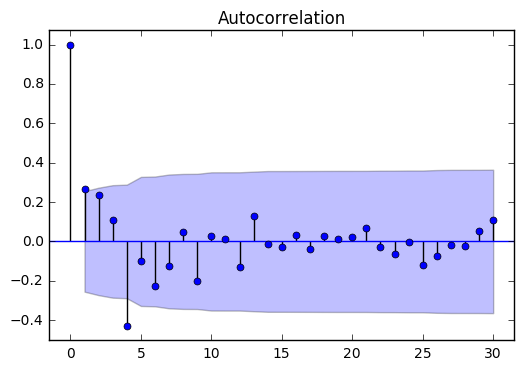

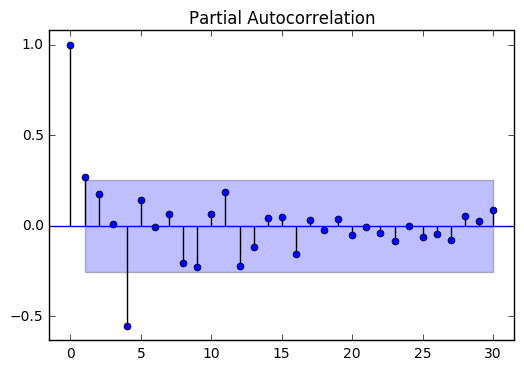

In [3]:
diff1 = diff0.diff()[1:]
diff1.plot(title='European Retail Trade Differenced Twice')
plot_acf(diff1, lags=30)
plot_pacf(diff1, lags=30)

In [8]:
import statsmodels.api as sm
data = df.stack().values
model = sm.tsa.statespace.SARIMAX(data, order=(2,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   64
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -29.933
Date:                           Thu, 22 Dec 2016   AIC                             69.866
Time:                                   16:10:31   BIC                             80.660
Sample:                                        0   HQIC                            74.118
                                            - 64                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6340      0.527      1.203      0.229      -0.399       1.667
ar.L2          0.1682      0.290      0.580      0.562      -0.400       0.737
ma.L1         -0.3208      0.453     -0.708      0.479      -1.208       0.567
ma.S.L4       -0.9019      0.333     -2.709      0.007      -1.554      -0.249
sigma2         0.1460      0.039      3.697      0.000       0.069       0.223
===================================================================================
Ljung-Box (Q):                       23.43   Jarque-Bera (JB):                 1.76
Prob(Q):                              0.98   Prob(JB):                         0.42
Heteroskedasticity (H):               0.56   Skew:                             0.11
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

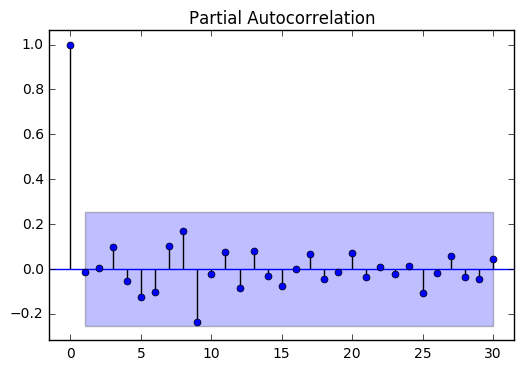

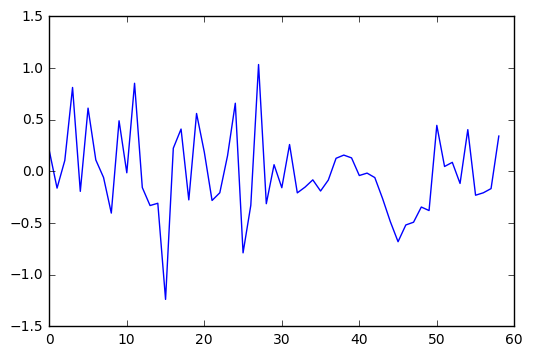

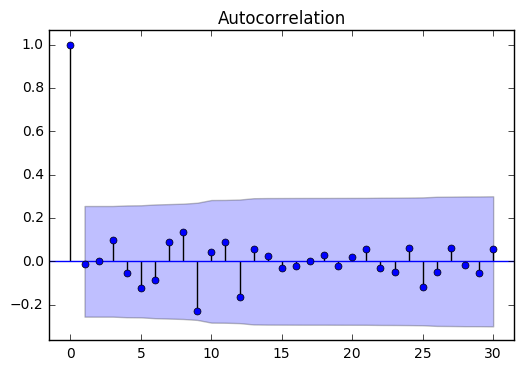

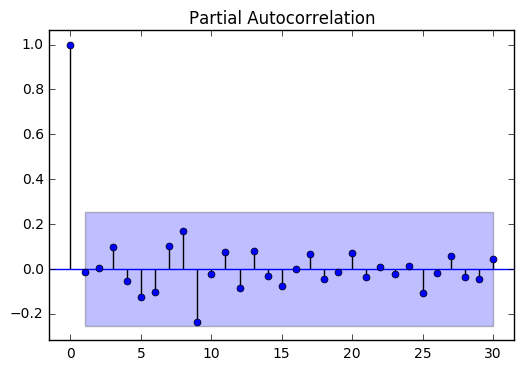

In [9]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
plt.plot(residuals)

plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(10, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)


(array([ 0.0105614 ,  0.01129004,  0.65880683,  0.84448831,  1.83918145,
         2.33814077,  2.87372644,  4.13119189,  7.9478738 ,  8.09708587]),
 array([ 0.91814657,  0.99437088,  0.8828475 ,  0.93238623,  0.87091966,
         0.88612433,  0.89643261,  0.84509704,  0.53940773,  0.61935418]))

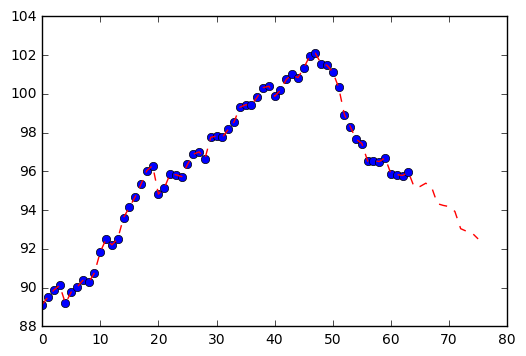

In [11]:
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,3), seasonal_order=(0,1,1,4), trend='c')
res = model.fit()

preds = res.forecast(12)
fcast = np.concatenate((data, preds), axis=0)

plt.figure();
plt.plot(data, 'o' , fcast, 'r--');